In [2]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [4]:
print(data_numerical.shape)
data_numerical.head(2)

(1460, 24)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

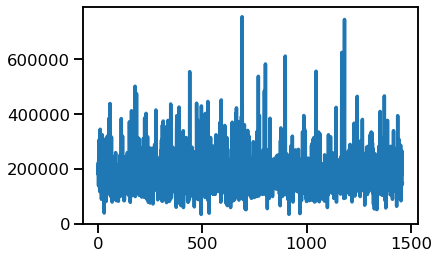

In [5]:
print(target.describe())
target.plot()

Start by fitting a ridge regressor (sklearn.linear_model.Ridge) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument return_estimator=True in sklearn.model_selection.cross_validate to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of sklearn.preprocessing.StandardScaler to scale the data before passing it to the regressor.

Question 1 (1 point possible)
How large is the largest absolute value of the weight (coefficient) in this trained model?

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ridge = Ridge(alpha=0)

ridge_regression = make_pipeline(scaler,
                                  ridge)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

In [7]:
feature_names = ridge_regression[0].get_feature_names_out(
    input_features=data_numerical.columns)
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.max()

LotFrontage      2.684950e+03
LotArea          2.128421e+03
MasVnrArea       9.086584e+03
BsmtFinSF1       4.551274e+18
BsmtFinSF2       1.575327e+18
BsmtUnfSF        4.355752e+18
TotalBsmtSF      4.771449e+18
1stFlrSF         2.609555e+18
2ndFlrSF         3.011876e+18
LowQualFinSF     3.446615e+17
GrLivArea        1.638947e+19
BedroomAbvGr    -9.465323e+03
KitchenAbvGr    -9.363883e+03
TotRmsAbvGrd     1.374142e+04
Fireplaces       4.069517e+03
GarageCars       2.327677e+04
GarageArea       3.949303e+03
WoodDeckSF       5.790611e+03
OpenPorchSF      3.128998e+03
EnclosedPorch   -1.818336e+03
3SsnPorch        1.697503e+03
ScreenPorch      2.871698e+03
PoolArea         5.679665e+02
MiscVal          3.164377e+03
dtype: float64

Question 2 (1 point possible)
Repeat the same experiment by fitting a ridge regressor (sklearn.linear_model.Ridge) with the default parameter (i.e. alpha=1.0).

How large is the largest absolute value of the weight (coefficient) in this trained model?

In [8]:
scaler = StandardScaler()
ridge = Ridge(alpha=1.0)

ridge_regression = make_pipeline(scaler,
                                  ridge)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

feature_names = ridge_regression[0].get_feature_names_out(
    input_features=data_numerical.columns)
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.max()

LotFrontage       2813.950135
LotArea           2601.096893
MasVnrArea        7822.622938
BsmtFinSF1       11098.319437
BsmtFinSF2         358.820285
BsmtUnfSF         4175.634363
TotalBsmtSF      15693.414764
1stFlrSF         11243.005735
2ndFlrSF         13642.435186
LowQualFinSF     -1280.035931
GrLivArea        18681.534058
BedroomAbvGr    -11075.212287
KitchenAbvGr    -10105.549408
TotRmsAbvGrd     13813.537407
Fireplaces        3758.486675
GarageCars       22562.769198
GarageArea        4626.005696
WoodDeckSF        5791.918839
OpenPorchSF       3030.459490
EnclosedPorch    -2102.823437
3SsnPorch         1697.856940
ScreenPorch       2172.624444
PoolArea            71.092558
MiscVal            607.322413
dtype: float64

Question 3 (1 point possible)
What are the two most important features used by the ridge regressor? You can make a box-plot of the coefficients across all folds to get a good insight.

Question 4 (1 point possible)
Remove the feature "GarageArea" from the dataset and repeat the previous experiment.

What is the impact on the weights of removing "GarageArea" from the dataset?

In [9]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

numerical_features.remove("GarageArea")

data_numerical = data[numerical_features]

scaler = StandardScaler()
ridge = Ridge(alpha=1.0)

ridge_regression = make_pipeline(scaler,
                                  ridge)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

feature_names = ridge_regression[0].get_feature_names_out(
    input_features=data_numerical.columns)
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.max()

LotFrontage       3050.032793
LotArea           2616.701180
MasVnrArea        7784.927777
BsmtFinSF1       11242.508045
BsmtFinSF2         364.283906
BsmtUnfSF         4125.676888
TotalBsmtSF      15799.183845
1stFlrSF         11123.582373
2ndFlrSF         13640.660824
LowQualFinSF     -1282.807241
GrLivArea        18578.859334
BedroomAbvGr    -11085.864653
KitchenAbvGr    -10136.068267
TotRmsAbvGrd     13816.022945
Fireplaces        3803.488159
GarageCars       19963.351138
WoodDeckSF        5785.339784
OpenPorchSF       2978.159897
EnclosedPorch    -2135.467975
3SsnPorch         1718.236988
ScreenPorch       2172.345807
PoolArea            57.255505
MiscVal            654.503711
dtype: float64

What is the main reason for observing the previous impact on the most important weight(s)?

 a) Both garage features are correlated and are carrying similar information b) Removing the "GarageArea" feature reduces the noise in the dataset c) Just some random effects

In [16]:
print("Are they highly correlated? Indeed. SO THIS MUST BE THE REASON. MULTICOLINEALIDAD ----> MAL")
data[["GarageCars", "GarageArea"]].corr()

Are they highly correlated? Indeed. SO THIS MUST BE THE REASON. MULTICOLINEALIDAD ----> MAL


,GarageCars,GarageArea
GarageCars,1.000000,0.882475
GarageArea,0.882475,1.000000


Question 6 (1 point possible)
Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor on the numerical data without the "GarageArea" column. Pass alphas=np.logspace(-3, 3, num=101) to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

In [32]:
print("LOGSPACE")
import numpy as np
[np.logspace(-3, 3, num=10)][0]

LOGSPACE


array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

In [35]:
from sklearn.linear_model import RidgeCV
print("Ridge regression with built-in cross-validation.")

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

numerical_features.remove("GarageArea")

data_numerical = data[numerical_features]

r = RidgeCV(alphas=[np.logspace(-3, 3, num=101)][0]).fit(data_numerical, target)
# r

Ridge regression with built-in cross-validation.


In [47]:
cv_results = cross_validate(r, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)


In [54]:
import pandas as pd

coefs = [est.coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

weights_linear_regression

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-26.165096,0.340163,43.256051,19.784739,-0.974421,7.389307,26.200529,28.633908,30.498108,-30.051651,...,7352.341795,5360.504847,25985.687907,36.329368,31.734671,-34.713063,64.201464,29.850989,-48.322309,0.686808
1,-53.001099,0.158909,36.237368,18.830994,0.061341,7.510117,26.401806,36.874721,38.878663,-55.794246,...,7823.393122,5256.095795,24744.084816,43.083471,24.079295,-51.746865,36.340992,13.424007,-45.127982,0.514774
2,-9.740168,0.061964,38.299600,19.788044,-2.790712,8.638359,25.635702,27.434312,31.224550,-30.773402,...,7867.614845,5346.726008,25155.883409,44.278135,26.340027,-43.814199,34.885895,36.028611,-42.018797,-3.601608
3,-15.280782,-0.129448,42.822006,18.643759,-2.169649,7.520873,23.994541,32.727918,32.376320,-32.765463,...,6496.805767,3521.524752,25024.283136,34.981401,45.994503,-45.644170,27.200608,28.033268,-51.973819,0.556234
4,20.439996,0.031088,34.070027,17.352339,1.304852,7.236614,25.896413,27.902465,31.487273,-34.334671,...,7598.647359,5651.676403,26609.284843,31.538080,29.998308,-40.356876,32.425050,35.142422,-38.016166,-0.006023
5,6.977353,-0.043123,34.178318,18.957172,-0.608130,5.817732,24.167048,29.276453,30.322426,-27.967574,...,6198.759902,5586.083413,26400.198982,38.178610,30.674405,-42.811106,34.611299,24.466169,-59.964730,0.467521
6,-26.261383,0.274405,37.890443,17.492891,2.127164,8.149087,27.771091,24.899261,31.839297,-27.954313,...,7467.477365,4774.096763,25906.022247,46.056137,37.722655,-41.669838,51.287190,34.762199,-42.961416,0.473303
7,-30.662637,0.098008,37.406812,18.347221,-1.608683,6.362599,23.100130,28.946529,26.783512,-24.483425,...,7733.699987,5839.578683,26003.336413,42.959923,30.032463,-55.711280,35.716980,28.455670,-44.760305,0.583299
8,145.881487,0.255305,37.096605,27.583995,-2.071721,10.896500,36.408774,24.953407,35.381188,-29.845345,...,7888.243890,3074.900278,20562.785613,26.749366,33.472946,-49.435674,0.902794,22.926273,1.722432,1.391786
9,0.512074,0.129761,37.919487,17.744906,1.370964,7.200936,26.315450,27.126467,30.110813,-27.438226,...,8544.081446,4125.371138,25830.730887,35.498939,22.598883,-44.016278,10.243526,39.829066,-70.683637,0.204235


In [56]:
weights_linear_regression["GarageCars"], weights_linear_regression["GarageCars"].std() 

(0    25985.687907
 1    24744.084816
 2    25155.883409
 3    25024.283136
 4    26609.284843
 5    26400.198982
 6    25906.022247
 7    26003.336413
 8    20562.785613
 9    25830.730887
 Name: GarageCars, dtype: float64,
 1742.4440711605994)

se vé que la std es pequeña. Ahora, no sé si entiendo bien el motivo.  it could mean that our model chose a stronger regularization parameter than the default value in Ridge.